<a href="https://colab.research.google.com/github/Oussoubicodes/CS4287-Assignment-1/blob/main/CS4287_Prj1_20242905_20250762.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Oussoubi Niakate - 20242905
#Dennis Kolomiyets - 20250762

#Runs with no errors

Imports

In [ ]:
from IPython.core.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import csv
import numpy as np
import tensorflow as tf

Visualising the Data

In [ ]:

#Fetch data through pandas
houses = pd.read_csv("Housing.csv")

#Displaying the first few rows of the data
display(houses.head())

#Dataset statistics
houses.describe()


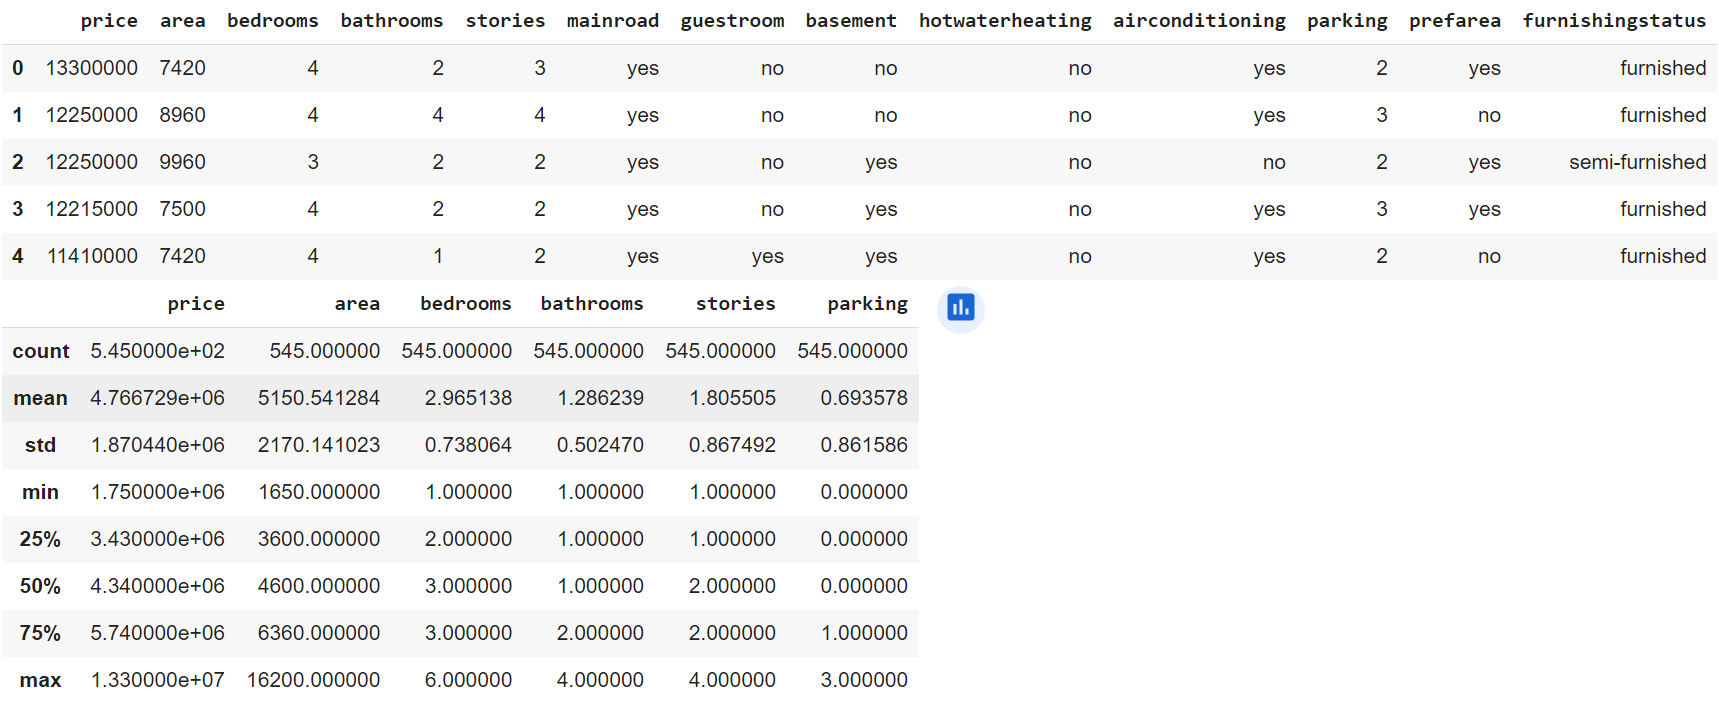

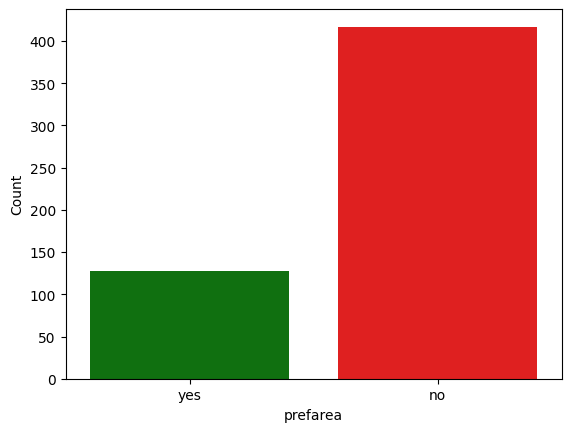

In [ ]:
#Showing the difference between houses located in a preferred area and not
my_colours = {"yes": 'green', "no": 'red'}
sbn.countplot(data=houses, x='prefarea', palette = my_colours)
plt.ylabel('Count')
plt.show()


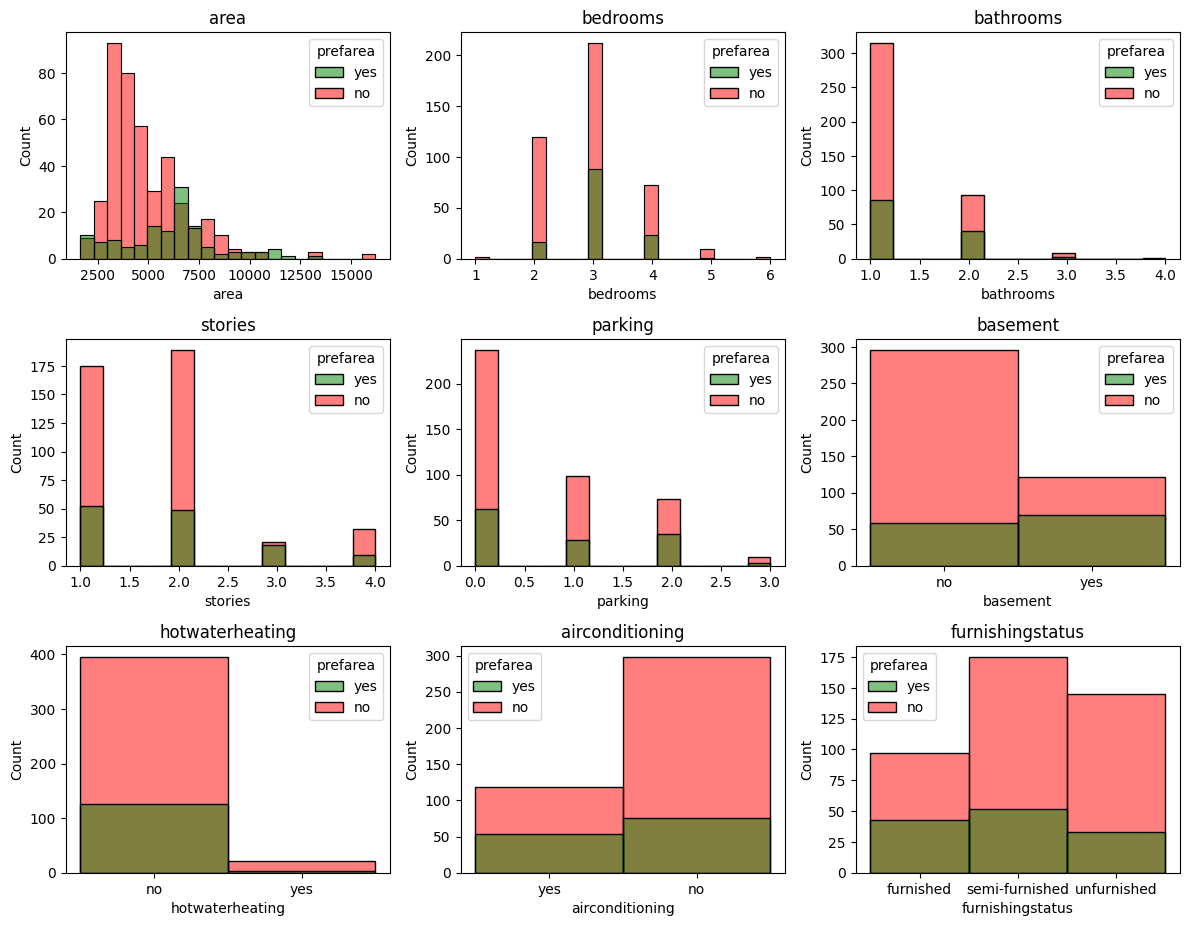

In [ ]:
#The different attributes that will be plotted
attri=['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'basement',
       'hotwaterheating', 'airconditioning', 'furnishingstatus']

#Determines the size of each subplot
fig = plt.figure(figsize=(12,12))

#Using a loop to plot the various different attributes
for i in range(len(attri)):
    plt.subplot(4,3,i+1)
    plt.title(attri[i])
    sbn.histplot(data=houses,x=houses[attri[i]],hue='prefarea', palette = my_colours)
plt.tight_layout()
plt.show()

Normalising the data

In [ ]:

houses_normalised = houses.copy()

#Identifying the columns with numerical values
houses_numer = houses.select_dtypes(include=[np.number])

#Finds the max value in each column
col_maxes = houses_numer.max()

#Finds the overall max value among all columns
houses_numer_max = col_maxes.max()

#Normalises data to a value between 0 and 1
houses_numer_normalised = houses_numer / houses_numer_max

#Reassigns normalised values back to their corresponding columns
houses_normalised[houses_numer_normalised.columns] = houses_numer_normalised

#Checking if it's been normalised correctly
display("Normalised Dataset", houses_normalised)

Training sets

In [ ]:
#Specifies seed for reproducibility
np.random.seed(1671)

#Shuffles the dataset
houses_normalised = houses_normalised.iloc[np.random.permutation(len(houses_normalised))]

#Splits dataset to training and testing; 80% training and 20% testing
training = houses_normalised.sample(frac = 0.8)
testing = houses_normalised.drop(training.index)

#Gives the number of rows in training and test
X_count = training.shape[0]
Y_count = testing.shape[0]

#Initialises the training/testing input and output list

X_train = []
Y_train = []
X_test = []
Y_test = []

#Loops through the dataframe and separate inputs and outputs for training and testing
for index, row in training.iterrows():
    X_train.append([row['area'],row['bedrooms'],row['bathrooms'], row['stories'], row['parking'], row['basement'],
       row['hotwaterheating'], row['airconditioning'], row['furnishingstatus']])
    Y_train.append([row['prefarea']])

for index, row in testing.iterrows():
    X_test.append([row['area'],row['bedrooms'],row['bathrooms'], row['stories'], row['parking'], row['basement'],
       row['hotwaterheating'], row['airconditioning'], row['furnishingstatus']])
    Y_test.append([row['prefarea']])

#Converts to numpy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

print("\nTraining and Test Datasets:\n")
print("\nX_train row[0]:\n", X_train[0], "\nShape:", X_train.shape)
print("\nY_train row[0]:\n", Y_train[0], "\nShape:", Y_train.shape)
print("\nX_test row[0]:\n", X_test[0], "\nShape:", X_test.shape)
print("\nY_test row[0]:\n", Y_test[0], "\nShape:", Y_test.shape)

INPUT=X_train.shape[1]


Model

In [86]:
import tensorflow as tf
import numpy as np

# Defining hyperparameters
EPOCHS = 200
BATCH_SIZE = 16
VALIDATION_SPLIT = 0.2
OPTIMISER = 'adam'
LOSS_FUNCTION = 'binary_crossentropy'


# Create a simple perceptron with "adam" optimizer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(INPUT,)),
    tf.keras.layers.Dropout(0.5),  # Add a dropout layer with a dropout rate of 0.5
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),  # Add another dropout layer with a dropout rate of 0.3
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with the "adam" optimizer and binary cross-entropy loss
model.compile(optimizer=OPTIMISER, loss=LOSS_FUNCTION, metrics=['accuracy'])

# Training the model using the training data and validating it on the test data
resHistory = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, Y_test))


Epoch 1/200


UnimplementedError: ignored